## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




# Combine the data into a single dataset
# print(mouse_metadata.head(2))
# print(study_results.head(2))



#combined_data_df = pd.merge(study_results, mouse_metadata, how="left", left_on="Mouse ID", how="right", right_on="MouseID")
combined_data_df = study_results.merge(mouse_metadata, how="left", on=["Mouse ID","Mouse ID"])
combined_data_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID","Mouse ID"])

combined_data_df.head(2)



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29


In [4]:
# Checking the number of mice.
combined_data_df["Mouse ID"].count()


1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
len(combined_data_df["Mouse ID"].unique())
combined_data_df["Mouse ID"].nunique()

combined_data_df.drop_duplicates(subset="Mouse ID")["Mouse ID"].count()


249

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 


duplicate_mouse_id = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
type(duplicate_mouse_id)

pd.DataFrame({'Mouse ID': duplicate_mouse_id})



,Mouse ID
0,g989


In [7]:


# Create a clean DataFrame by dropping the duplicate mouse by its ID.

duplicate_mouse_df = combined_data_df.loc[combined_data_df["Mouse ID"] == "g989"]

print(len(duplicate_mouse_df))

duplicate_mouse_df.head(2)




13


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.0,0,Propriva,Female,21,26
137,g989,0,45.0,0,Propriva,Female,21,26


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_data_df = combined_data_df.loc[combined_data_df["Mouse ID"] != "g989"]
clean_data_df["Mouse ID"].count()

1880

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


means = clean_data_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = clean_data_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = clean_data_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stds = clean_data_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = clean_data_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_stats_tbl_df = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":stds,
                              "Tumor Volume Std. Err.":sems})
summary_stats_tbl_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_tbl_df = clean_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

summary_stats_tbl_df




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
value_counts = clean_data_df['Drug Regimen'].value_counts()
value_counts 



Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

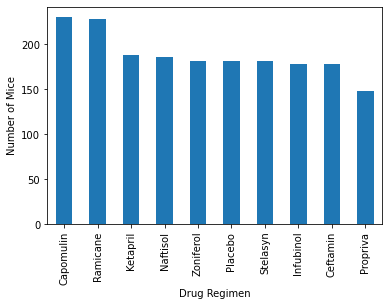

In [29]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
value_counts = clean_data_df['Drug Regimen'].value_counts()
#value_counts.plot(kind="bar")
value_counts.plot.bar()
plt.xlabel("Drug Regimen")
#plt.xticks(rotation=90)
plt.ylabel("Number of Mice")
plt.show()



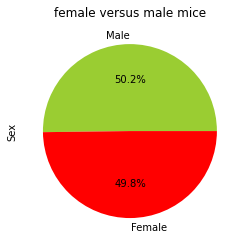

In [30]:
#Generate a pie plot showing the distribution of female versus male mice using pandas
counts = combined_data_df.drop_duplicates(subset="Mouse ID")['Sex'].value_counts()

#counts.plot(kind="pie",autopct='%1.3f%%')

counts.plot.pie(y='Sex',autopct="%1.1f%%",title = "female versus male mice", legend=False, colors = ["yellowgreen", "red"])

plt.show()

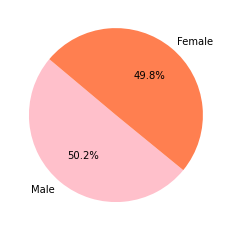

In [31]:
male_mice = combined_data_df.loc[combined_data_df["Sex"] == "Male"]
male_count = male_mice["Mouse ID"].nunique()
female_mice = combined_data_df.loc[combined_data_df["Sex"] == "Female"]
female_count = female_mice["Mouse ID"].nunique()
female_count

# sex_df = pd.DataFrame([male_count,female_count],index=["male", "female"], columns=['sex'])
# sex_df = pd.DataFrame({"sex": [male_count,female_count]},index=["male", "female"])

labels = ["Male", "Female"]
sizes = [male_count, female_count]
colors = ["pink", "coral"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)

#plt.pie(sex_df,autopct='%1.1f%%')
plt.show()

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

combined_data_df.drop_duplicates(subset="Mouse ID")['Sex'].value_counts()

Male      125
Female    124
Name: Sex, dtype: int64

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


max_tumor_df = clean_data_df.groupby(["Mouse ID"]).max()
max_tumor_df = max_tumor_df.reset_index()
max_tumor_df.head(3)

merged_data_df = max_tumor_df[['Mouse ID','Timepoint']].merge(clean_data_df,on=['Mouse ID','Timepoint'],how="left")

capomulin = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']

capomulin.to_frame().head(3)





# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Tumor Volume (mm3)
19,38.982878
24,38.939633
61,30.485985


In [33]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]







# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data_df.loc[merged_data_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{drug}'s potential outliers: {final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]}")
    print()

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



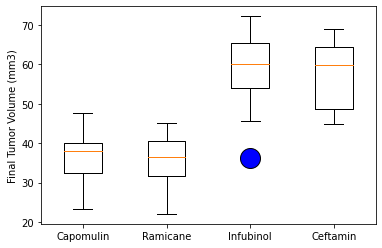

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
max_tumor_df = clean_data_df.groupby(["Mouse ID"]).max()
max_tumor_df = max_tumor_df.reset_index()

merged_data_df = max_tumor_df[['Mouse ID','Timepoint']].merge(clean_data_df,on=['Mouse ID','Timepoint'],how="left")

capomulin = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

outliers = dict(markerfacecolor='blue',markersize=20)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=outliers)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

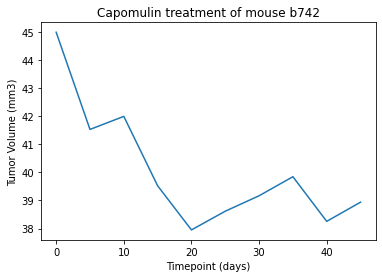

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == "Capomulin"]
b742_df = capomulin_df.loc[capomulin_df['Mouse ID']== 'b742']
plt.plot(b742_df['Timepoint'], b742_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse b742')
plt.show 

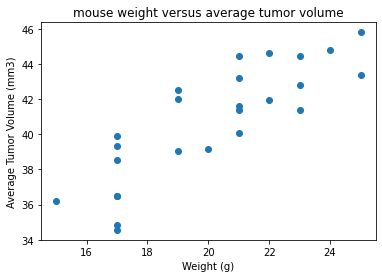

In [40]:
Gencapomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == "Capomulin"]
capomulin_average_df = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('mouse weight versus average tumor volume')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


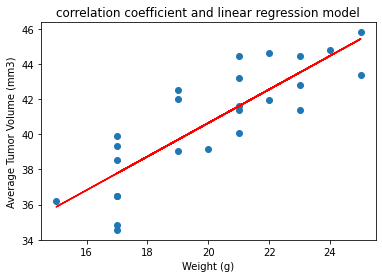

In [44]:
# Calculate the correlation coefficient and linear regression model 
# fcapomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == "Capomulin"]
capomulin_average_df = capomulin_df.groupby(['Mouse ID']).mean()

corr=round(st.pearsonr(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")

model = st.linregress(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])
y_values = capomulin_average_df['Weight (g)']*model[0]+model[1]

plt.scatter(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])
plt.plot(capomulin_average_df['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('correlation coefficient and linear regression model')
plt.show()
